Preparation

In [3]:
# import libraries and set matplotlib options
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
# import dataset 
df_house = pd.read_csv("data/eda.csv")

# Data Exploration

In [6]:
df_house.shape

(21597, 21)

In [7]:
df_house.dtypes

id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
dtype: object

In [8]:
df_house.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000


In [52]:
# Calculate number and percentage of NaNs

def nans_sum_perc(x):
    nans_sum_perc_d = {}
    for i in x.columns:
        sum_nan = x[i].isna().sum() 
        if  sum_nan > 0:
            perc_nan = round((sum_nan / x[i].shape[0]) * 100, 2)
            nans_sum_perc_d.update({i: [sum_nan, perc_nan]})
    return pd.DataFrame.from_dict(nans_sum_perc_d, orient='index', columns=['NaN Count', 'NaN %'])

nans_sum_perc(df_house)

,NaN Count,NaN %
waterfront,2391,11.070
view,63,0.290
sqft_basement,452,2.090
yr_renovated,3848,17.820


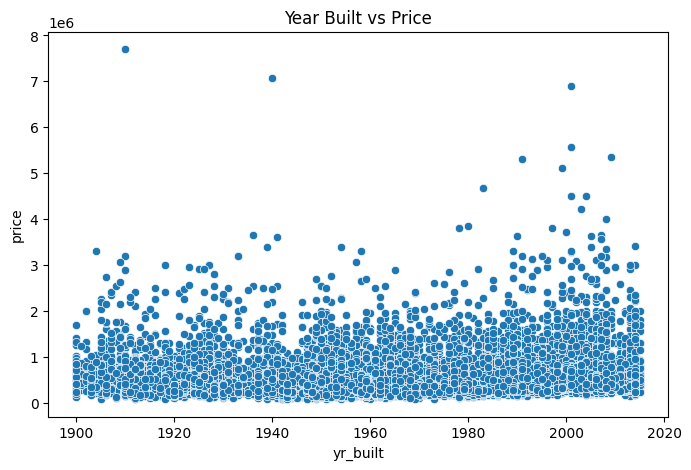

In [67]:
sns.scatterplot(x='yr_built', y='price', data=df_house)
plt.title('Year Built vs Price')
plt.show()

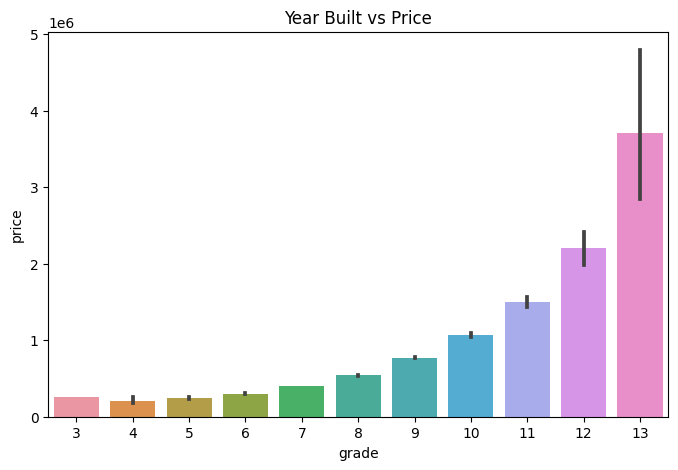

In [28]:
sns.barplot(x='grade', y='price', data=df_house)
plt.title('Year Built vs Price')
plt.show()

<Axes: xlabel='yr_built', ylabel='yr_renovated'>

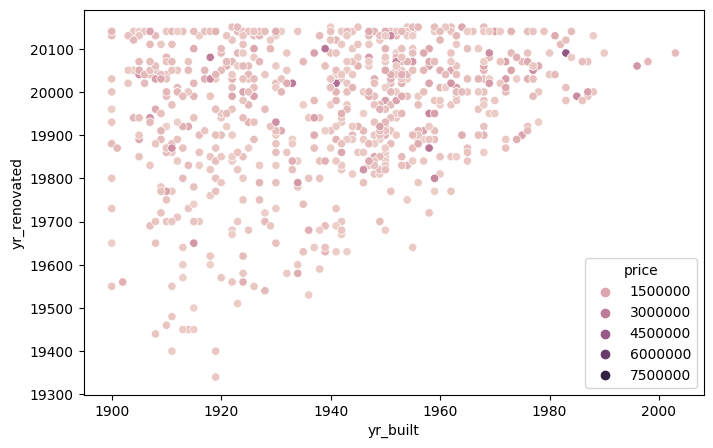

In [27]:
# Filter out rows where yr_renovated is 0
df_pairplot = df_house[df_house['yr_renovated'] != 0]

sns.scatterplot(x="yr_built", y="yr_renovated", data=df_pairplot, hue="price")

<Axes: xlabel='zipcode', ylabel='price'>

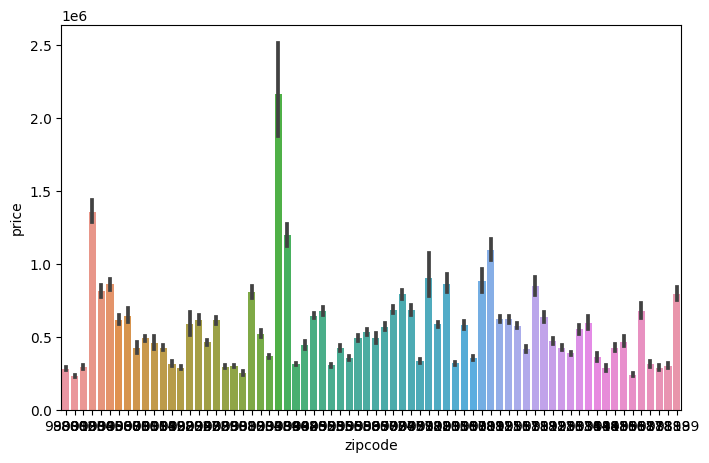

In [14]:
sns.barplot(x="zipcode", y="price", data=df_house)

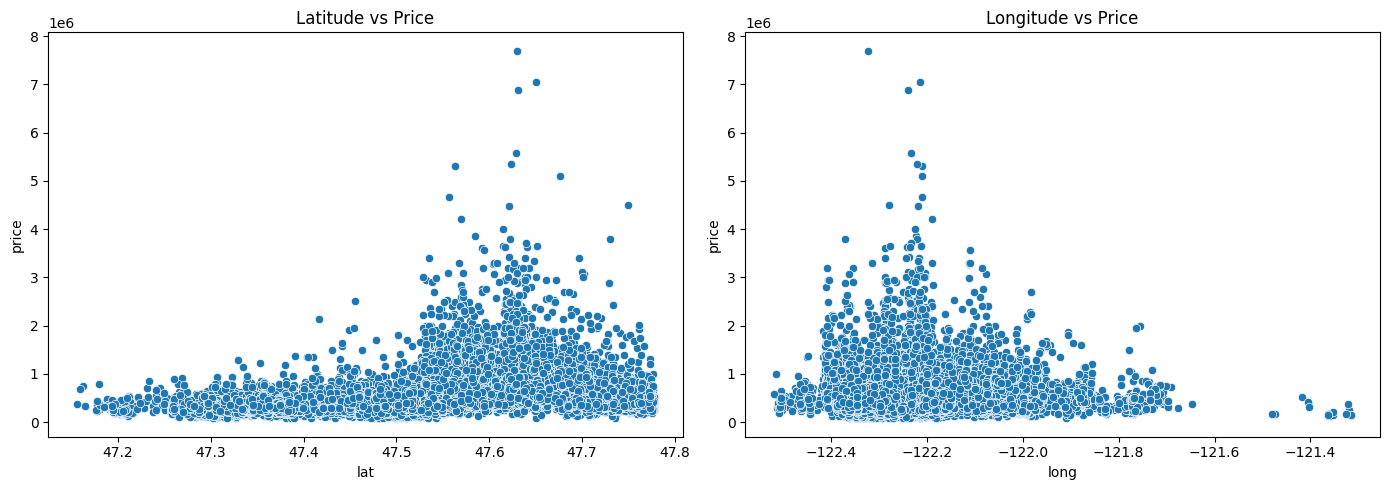

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(x="lat", y="price", data=df_house, ax=axes[0])
axes[0].set_title("Latitude vs Price")

sns.scatterplot(x="long", y="price", data=df_house, ax=axes[1])
axes[1].set_title("Longitude vs Price")

plt.tight_layout()
plt.show()

# Data cleaning

<Axes: >

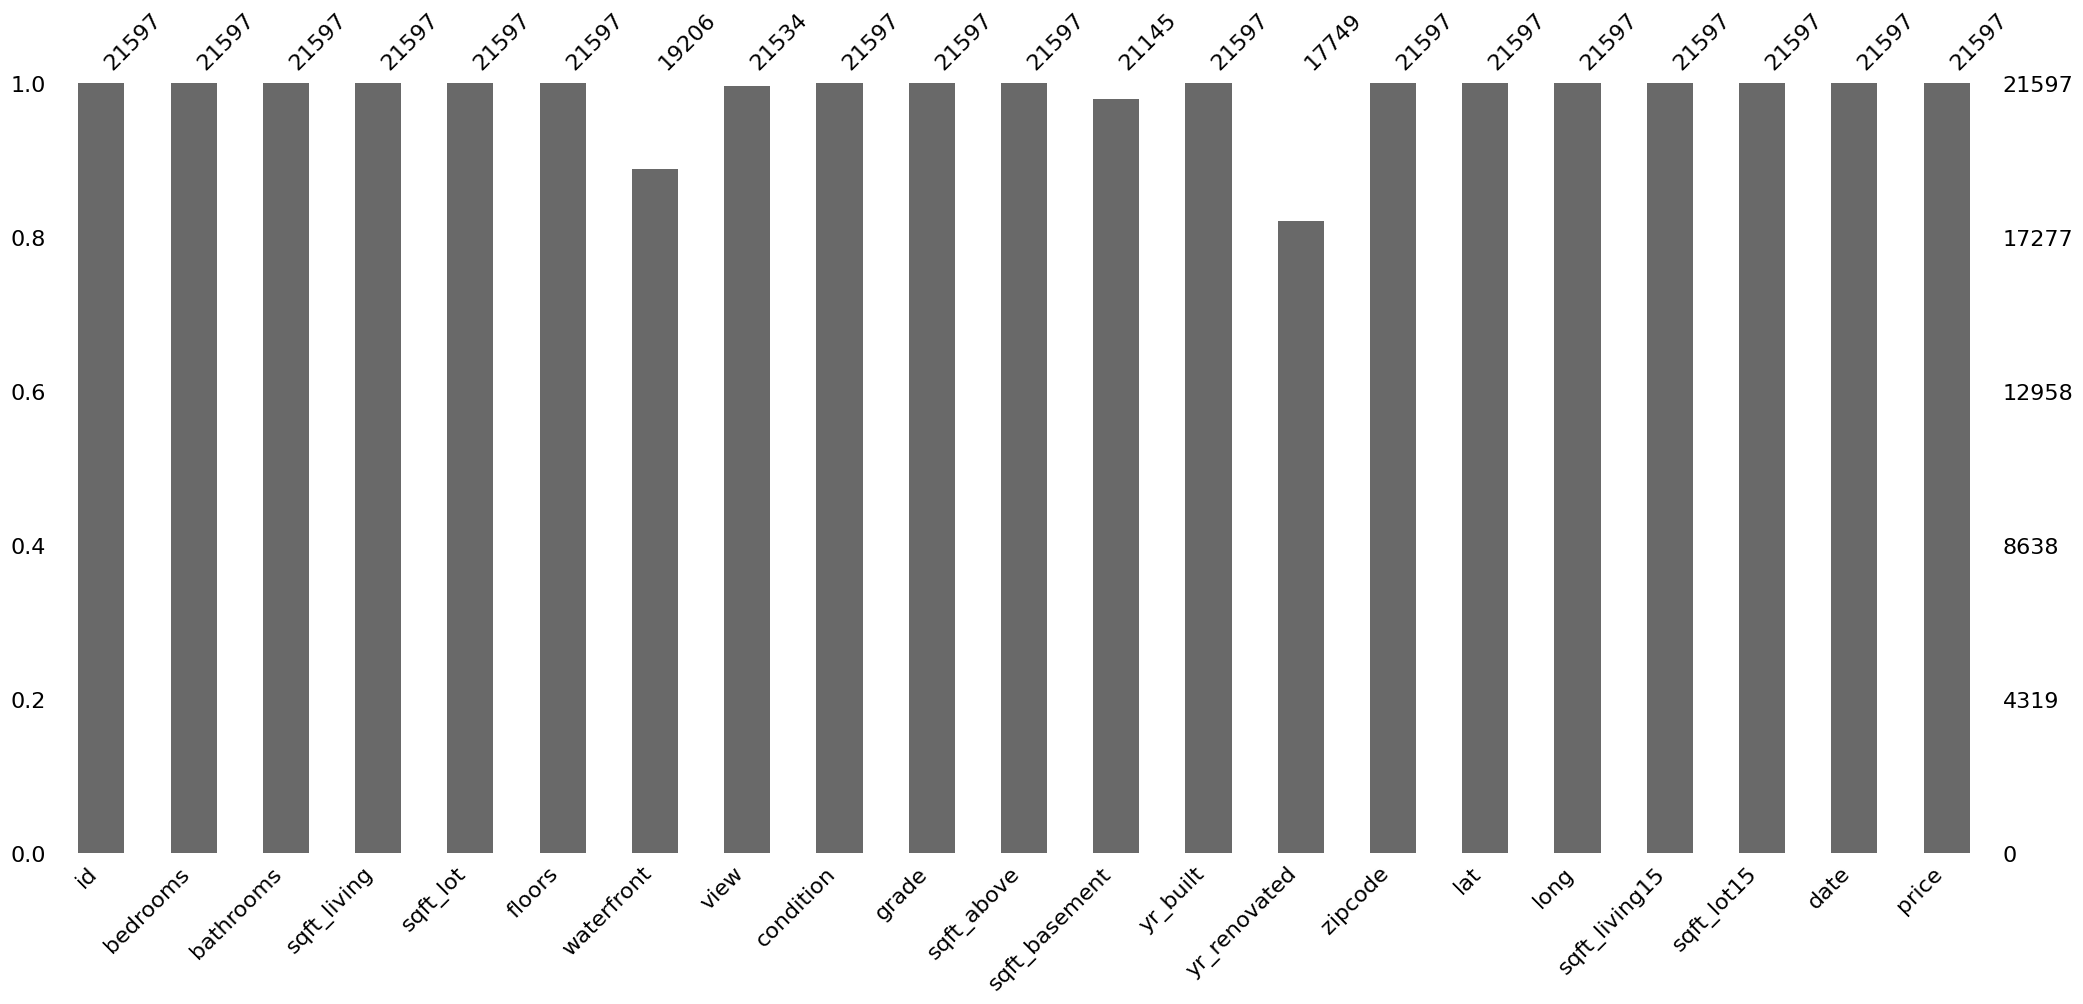

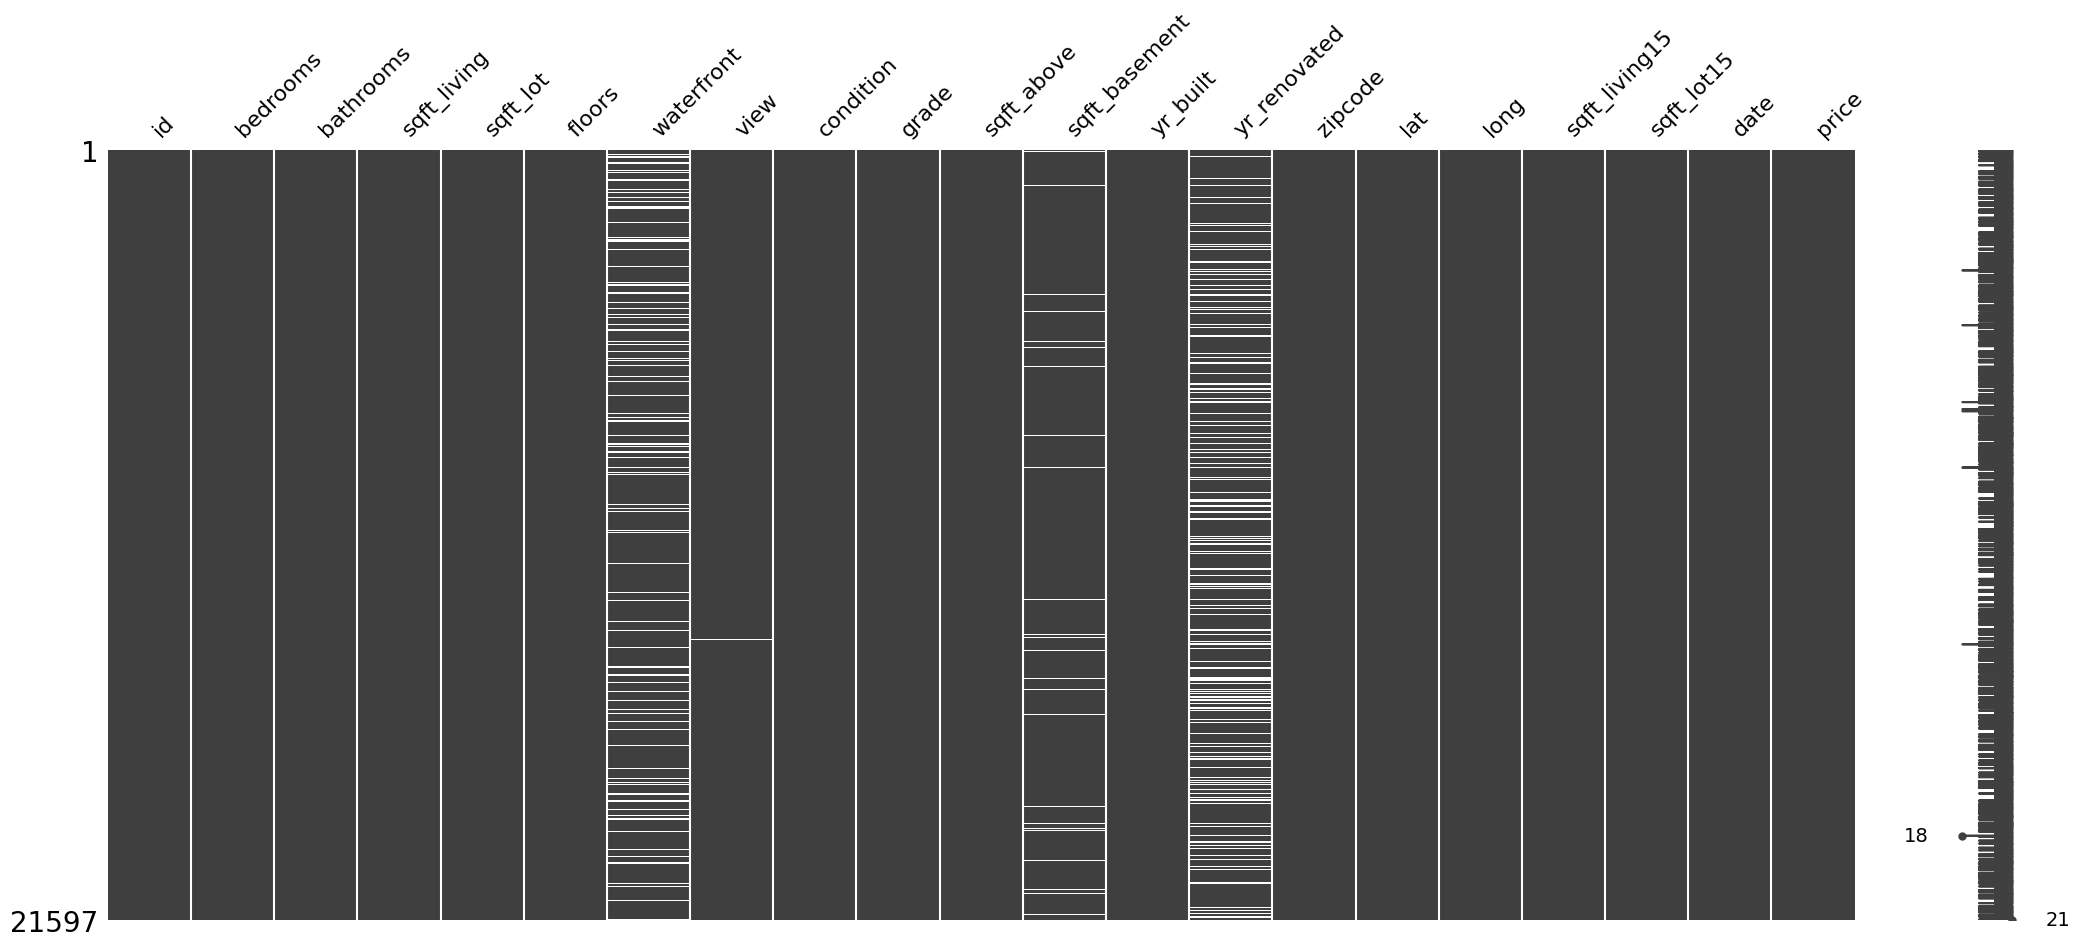

In [11]:
# check for missing values
import missingno as msno
msno.bar(df_house)
msno.matrix(df_house)

In [ ]:
# check for data doubplicates 
df_house.duplicated().value_counts()

False    21597
Name: count, dtype: int64